Question 1

In [1]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

USPS_train = np.genfromtxt('zip.train', delimiter = ' ')
USPS_test = np.genfromtxt('zip.test', delimiter = ' ')
USPS_data = np.concatenate([USPS_train,USPS_test])
USPS_X = USPS_data[:,1:np.shape(USPS_data)[0]]
USPS_Y = USPS_data[:,0]


In [2]:
wine = load_wine()

Question 2

In [3]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine['data'], wine['target'],random_state=1505)
usps_X_train, usps_X_test, usps_y_train, usps_y_test = train_test_split(USPS_X, USPS_Y,random_state=1505)

Question 3

wine Data

In [75]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, wine_X_train, wine_y_train, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_C = C
            best_gamma = gamma
svm = SVC(C=best_C, gamma=best_gamma)
svm.fit(wine_X_train,wine_y_train)
train_score = svm.score(wine_X_train,wine_y_train)            
print("Best CV score:", best_score)
print("Best parameters C and gamma:", best_C, best_gamma)
print("train set score with best parameters:", train_score)

Best CV score: 0.7803915343915344
Best parameters C and gamma: 100 0.001
train set score with best parameters: 1.0


When using the default of parameters, it found out that  CV score is not high. 

usps data

In [76]:
import warnings
warnings.filterwarnings("ignore")

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, usps_X_train, usps_y_train, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_C = C
            best_gamma = gamma
svm = SVC(C=best_C, gamma=best_gamma)
svm.fit(usps_X_train,usps_y_train)
train_score = svm.score(usps_X_train,usps_y_train)            
print("Best CV score:", best_score)
print("Best parameters C and gamma:", best_C, best_gamma)
print("train set score with best parameters:", train_score)

Best CV score: 0.9757626104526891
Best parameters C and gamma: 10 0.01
train set score with best parameters: 0.9998565897031407


Unlike wine data, usps data seems like to obtain high CV score even using the default of parameters

Question 4

wine data

In [77]:
svm = SVC(C=100, gamma=0.001)
svm.fit(wine_X_train, wine_y_train)
y_pred = svm.predict(wine_X_test)
MSE = np.mean(y_pred !=wine_y_test)
print("TEST error rate:", MSE)

TEST error rate: 0.2222222222222222


when comparing test error rate of wine data with task 3, test error rate is slightly higher than task 3

USPS data

In [78]:
svm = SVC(C=100, gamma=0.01)
svm.fit(usps_X_train, usps_y_train)
y_pred = svm.predict(usps_X_test)
MSE = np.mean(y_pred !=usps_y_test)
print("TEST error rate:", MSE)

TEST error rate: 0.024516129032258065


when comparing test error rate of USPS data with task 3, test error rate seems like lower than the results of task 3 

Question 5

Wine data

using MinMaxScaler() (grid search)

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("Maxscaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(wine_X_train, wine_y_train)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1 ,1, 10 ,100]}
grid = GridSearchCV(pipe,param_grid = param_grid, cv=5)
grid.fit(wine_X_train, wine_y_train)

print("test score:", grid.score(wine_X_test,wine_y_test))
print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

test score: 0.9777777777777777
Best score: 0.9849624060150376
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


using Normalizer() (grid search)

In [80]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("Normalizer", Normalizer()), ("svm", SVC())])
pipe.fit(wine_X_train, wine_y_train)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1 ,1, 10 ,100]}
grid = GridSearchCV(pipe,param_grid = param_grid, cv=5)
grid.fit(wine_X_train, wine_y_train)

print("test score:", grid.score(wine_X_test,wine_y_test))
print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)


test score: 0.8888888888888888
Best score: 0.9699248120300752
Best parameters: {'svm__C': 100, 'svm__gamma': 100}


using StandardScaler() (grid search)

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("StandardScaler", StandardScaler()), ("svm", SVC())])
pipe.fit(wine_X_train, wine_y_train)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1 ,1, 10 ,100]}
grid = GridSearchCV(pipe,param_grid = param_grid, cv=5)
grid.fit(wine_X_train, wine_y_train)

print("test score:", grid.score(wine_X_test,wine_y_test))
print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

test score: 0.9777777777777777
Best score: 0.9849624060150376
Best parameters: {'svm__C': 0.1, 'svm__gamma': 0.1}


using RobustScaler() (grid search)


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("StandardScaler", RobustScaler()), ("svm", SVC())])
pipe.fit(wine_X_train, wine_y_train)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1 ,1, 10 ,100]}
grid = GridSearchCV(pipe,param_grid = param_grid, cv=5)
grid.fit(wine_X_train, wine_y_train)

print("test score:", grid.score(wine_X_test,wine_y_test))
print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

test score: 0.9777777777777777
Best score: 0.9849624060150376
Best parameters: {'svm__C': 1, 'svm__gamma': 0.1}


When comparing Normalizer with other normalization function such as MinMaxscaler(), StandardScaler, RobustScaler,  the test score used other functions are higher than the one used normalizer function.

USPS data

using MinMaxScaler() (grid search)

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("Maxscaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(usps_X_train, usps_y_train)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1 ,1, 10 ,100]}
grid = GridSearchCV(pipe,param_grid = param_grid, cv=5)
grid.fit(usps_X_train, usps_y_train)

print("test score:", grid.score(usps_X_test,usps_y_test))
print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

test score: 0.9724731182795698
Best score: 0.9693101964721067
Best parameters: {'svm__C': 10, 'svm__gamma': 0.01}


using Normalizer() (grid search)

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("Normalizer", Normalizer()), ("svm", SVC())])
pipe.fit(usps_X_train, usps_y_train)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1 ,1, 10 ,100]}
grid = GridSearchCV(pipe,param_grid = param_grid, cv=5)
grid.fit(usps_X_train, usps_y_train)

print("test score:", grid.score(usps_X_test,usps_y_test))
print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

test score: 0.9741935483870968
Best score: 0.9738993259716048
Best parameters: {'svm__C': 10, 'svm__gamma': 1}


Unlike wine data, it obtains the highest score when using normalizer function.

Question 6

Wine data

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("Maxscaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(wine_X_train, wine_y_train)

param_grid = {'svm__C': [1], 'svm__gamma': [1]}
grid = GridSearchCV(pipe,param_grid = param_grid, cv=5)
grid.fit(wine_X_train, wine_y_train)
y_pred = grid.predict(wine_X_test)
accuracy = np.mean(y_pred == wine_y_test)
test_error = np.mean(y_pred != wine_y_test)

print("test accuracy:", accuracy)
print("test error rate:", test_error)

test accuracy: 0.9777777777777777
test error rate: 0.022222222222222223


USPS data

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("Normalizer", Normalizer()), ("svm", SVC())])
pipe.fit(usps_X_train, usps_y_train)

param_grid = {'svm__C': [10], 'svm__gamma': [1]}
grid = GridSearchCV(pipe,param_grid = param_grid, cv=5)
grid.fit(usps_X_train, usps_y_train)
usps_y_pred = grid.predict(usps_X_test)
usps_accuracy = np.mean(usps_y_pred == usps_y_test)
usps_test_error = np.mean(usps_y_pred != usps_y_test)

print("test accuracy:", usps_accuracy)
print("test error rate:", usps_test_error)

test accuracy: 0.9741935483870968
test error rate: 0.025806451612903226


In the case of USPS data, it was found out that the test error rate was lower after normalization than before when using the default of parameters.


Question 7 wine_data

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
%matplotlib inline
import matplotlib.pyplot as plt

def KfoldFunc(X_train, y_train,X_test):
    cKf = KFold(shuffle=True,n_splits = 5, random_state = 0)

    ranks = 0
    rank2 = 0
    returnlist = []

    for trainProper_index, calibration_index in cKf.split(X_train):
        X_properTrain, X_calibration = X_train[trainProper_index], X_train[calibration_index]
        y_properTrain, y_calibration = y_train[trainProper_index], y_train[calibration_index]
        ranks = calcconformity(X_properTrain,y_properTrain,X_test)
        for i in range(len(ranks)):
            Maxval = max(ranks[i])
            Maxidx = np.where(ranks[i] == Maxval)
            returnlist.append(Maxidx[0])


    return returnlist

def calcconformity(X_proper, y_proper, X_test):

    pV = [];
    idx = 0;
    pipe = Pipeline([("Maxscaler", MinMaxScaler()), ("svm", SVC())])
    pipe.fit(X_proper, y_proper)
    param_grid = {'svm__C': [1], 'svm__gamma': [1]}
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
    grid.fit(X_proper, y_proper)
    bestValue = grid.decision_function(X_test)
    return bestValue


def pValuecalc(list,n):

    pValue = 0
    sumAll = sum(list) + 1
    length = n+1.00
    pValue = (sumAll) / length


    return pValue

def plotCalibration(pValue,X_test,y_test):
    eps = 1.0*(np.arange(100)+1)/100
    err = np.zeros(100)
    for i in range(100):
        #eps[i] = i / 100
        #err = 0
        for j in range(np.shape(X_test)[0]):
            if pValue[j] <= eps[i]:
                err[i] = err[i] + 1
        err[i] = err[i] / np.shape(X_test)[0]

    
    plt.plot(eps,err)
    plt.title("Calibration plot")

def main(X_train, y_train, X_test, y_test):
    Value = 0
    list = KfoldFunc(X_train, y_train, X_test)
    Value = pValuecalc(list,len(X_train) + len(y_train))
    print("Average P-Value: ", Value)
    plotCalibration(list,X_test,y_test)
    return Value

Wine Data

Average P-Value:  [0.82771536]


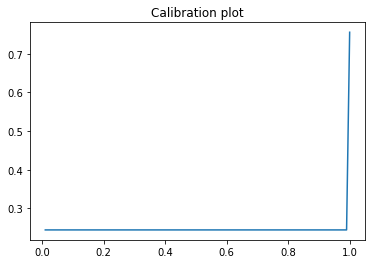

In [20]:
#wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine['data'], wine['target'],random_state=1505)
#usps_X_train, usps_X_test, usps_y_train, usps_y_test = train_test_split(USPS_X, USPS_Y,random_state=1505)

Value = main(wine_X_train,wine_y_train,wine_X_test,wine_y_test)


USPS DATA

Average P-Value:  [0.09270811]


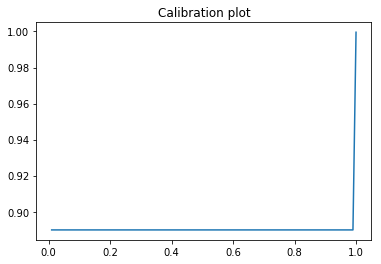

In [21]:
Value = main(usps_X_train,usps_y_train,usps_X_test,usps_y_test)